<h1 style="color:#347C2C; font-size:50px; font-weight:bold; text-align:center;">Book Recommendation System</h1>

<h2 style="color:#004080; font-size:30px; font-weight:bold; text-align:left; margin-top:20px;"> Problem Statement </h2> <p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;"> In today's digital age, where the volume of content and product choices is overwhelming, recommender systems act as personalized curators. These intelligent algorithms are designed to sift through vast amounts of data to suggest the most relevant items to users — whether it’s a movie to stream, an article to read, or a product to purchase. Their influence spans multiple industries and has become a cornerstone for user engagement and revenue growth. When effective, a recommendation engine can not only boost sales but also transform a platform into a trusted companion for users, setting it apart from competitors. </p> <p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;"> This project focuses on building a smart, data-driven <strong>Book Recommendation System</strong>. The goal is to help users discover books they are most likely to enjoy, based on past preferences, behavior, and patterns in the data. By enhancing the reading experience with tailored suggestions, this system aims to make book discovery more efficient, enjoyable, and personalized. </p>

<h2 style="color:#004080; font-size:30px; font-weight:bold; text-align:left; margin-top:20px;">
    Understanding the Data
</h2>

<p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;">
    The Book-Crossing dataset comprises three files: <b>Users, Books, and Ratings</b>. It contains anonymized user information, book metadata, and rating details.
</p>

</p>

<p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;">
    <strong>Users:</strong>
</p>
<ul style="color:#333333; font-size:18px; line-height:1.6;">
    <li>This table has information about the people using the platform.</li>
    <li>Each user has a unique ID (which is just a number).</li>
    <li>If available, we also get details like where they live (<b>Location</b>) and their <b>Age</b>.</li>
    <li>If a user hasn't shared this information, these fields are left empty.</li>
</ul>

<p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;">
    <strong>Books:</strong>
</p>
<ul style="color:#333333; font-size:18px; line-height:1.6;">
    <li>This table contains details about different books.</li>
    <li>Each book is identified by a special code called an <b>ISBN</b>.</li>
    <li>Books with incorrect ISBNs have already been removed.</li>
    <li>The table also includes: <b>Title</b>, <b>Author</b> (only the first if there are multiple), <b>Year of Publication</b>, and <b>Publisher</b>.</li>
    <li>It also has links to book cover images in three sizes: <b>small, medium, and large</b>, all pointing to Amazon.</li>
</ul>

<p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;">
    <strong>Ratings:</strong>
</p>
<ul style="color:#333333; font-size:18px; line-height:1.6;">
    <li>This table stores book ratings given by users.</li>
    <li>The ratings are of two types:</li>
    <ul style="margin-left: 20px;">
        <li><b>Explicit</b> (ratings from <b>1 to 10</b>, higher meaning better)</li>
        <li><b>Implicit</b> (a rating of <b>0</b> when a user interacted with a book but didn’t rate it)</li>
    </ul>
</ul>


<h2 style="color:#004080; font-size:30px; font-weight:bold; text-align:left; margin-top:20px;">
    Project Workflow
</h2>

<ul style="color:#333333; font-size:18px; line-height:1.8;">
  <li><strong>Importing Libraries:</strong> Load all the necessary Python libraries for data processing and building the recommender system.</li>

  <li><strong>Loading the Dataset:</strong> Read the Book-Crossing dataset files into dataframes for analysis.</li>

  <li><strong>Preliminary Analysis:</strong> Explore the dataset to understand its structure, check for null values, and get familiar with the data.</li>

  <li><strong>Building the Recommender System:</strong> 
    <ul style="list-style-type:circle; padding-left: 20px;">
      <li>Popularity-Based Recommendation</li>
      <li>Collaborative Filtering-Based Recommendation</li>
    </ul>
  </li>

  <li><strong>Exporting Data using Pickle:</strong> Save the processed data and models for use in a web application.</li>
</ul>


# 1. Importing Libraries

In [6]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# 2. Loading the Dataset

In [8]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv("Ratings.csv") 


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15964\3155208537.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


# 3. Preliminary Analysis

### Check dataset shapes

In [11]:
print("\nShape of Books Dataset:", books.shape)
print("Shape of Ratings Dataset:", ratings.shape)
print("Shape of Users Dataset:", users.shape)


Shape of Books Dataset: (271360, 8)
Shape of Ratings Dataset: (1149780, 3)
Shape of Users Dataset: (278858, 3)


### Display first few rows of each dataset

In [13]:
print("\nBooks Dataset:")
books.head()


Books Dataset:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
print("\nRatings Dataset:")
ratings.head()


Ratings Dataset:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
print("\nUsers Dataset:")
users.head()


Users Dataset:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Check for missing values

In [17]:
print("\nMissing Values in Books:")
print(books.isnull().sum())
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())
print("\nMissing Values in Users:")
print(users.isnull().sum())



Missing Values in Books:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Missing Values in Ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Missing Values in Users:
User-ID          0
Location         0
Age         110762
dtype: int64


<br>
<p style="color:#333333; font-size:18px; line-height:1.6; text-align:justify;">
<strong><u>NOTE:</u></strong> </strong>Some fields like <button>Age</button> had a large number of missing values, but since they <strong>weren’t crucial for the recommendation logic or core EDA goals</strong>, they were intentionally left untouched. This helped preserve data integrity for fields like <button>Location</button>, and also reduced unnecessary preprocessing.
</p>
<br>

# 4. Exploratory Data Analysis 

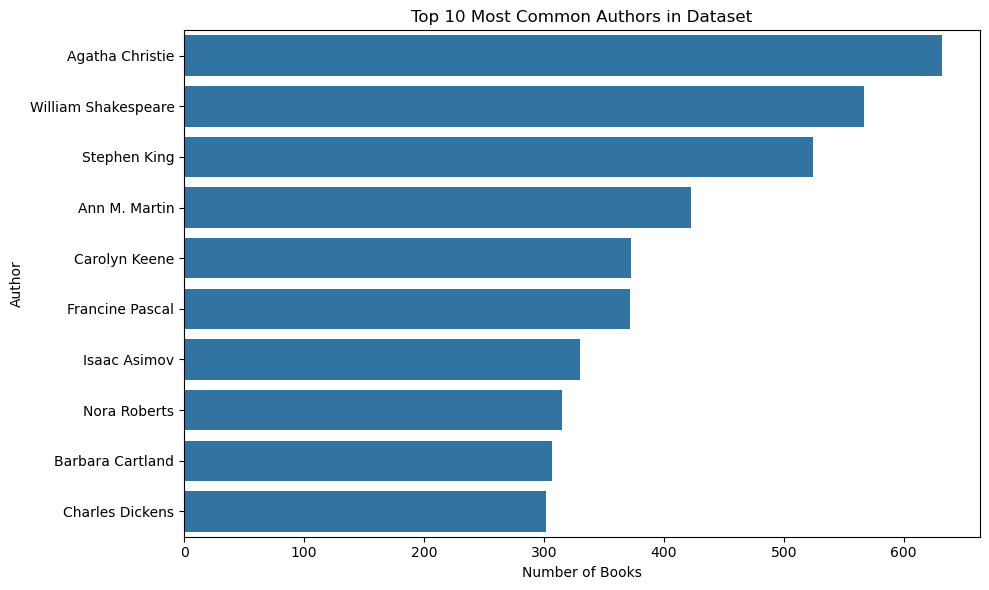

In [20]:
# Count of books per author
author_counts = books['Book-Author'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.title('Top 10 Most Common Authors in Dataset')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


In [121]:
# Convert Year column to numeric safely
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [123]:
# Filter valid publication years
books_year = books[(books['Year-Of-Publication'] >= 1800) & (books['Year-Of-Publication'] <= 2025)].copy()

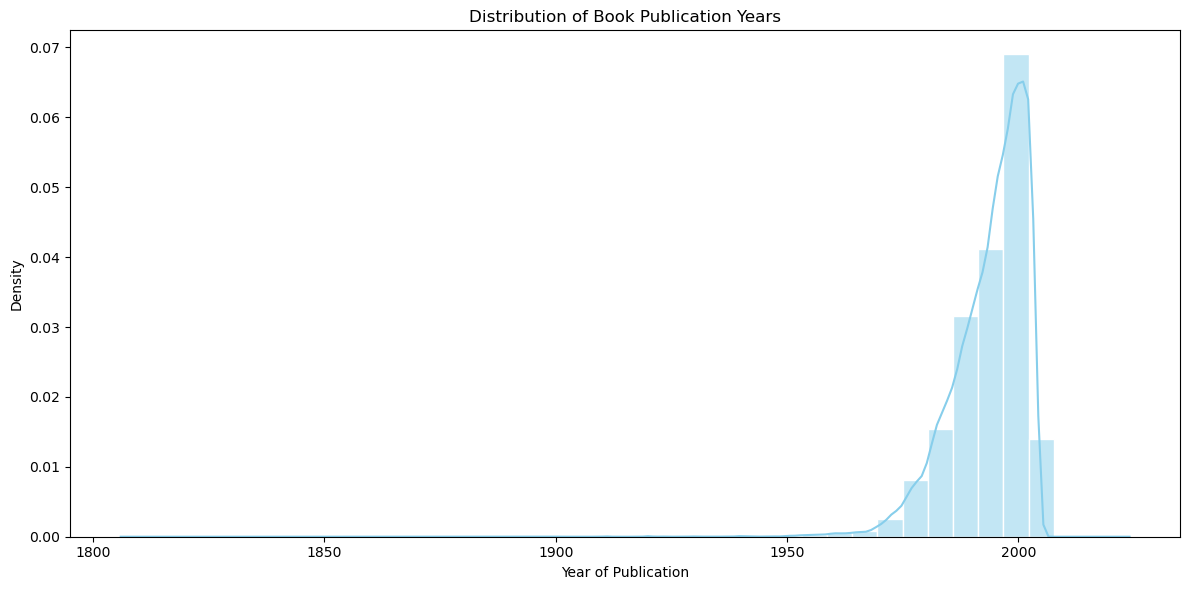

In [127]:
# Distribution of Book Publication Years
plt.figure(figsize=(12,6))
sns.histplot(books_year['Year-Of-Publication'], 
             bins=40, 
             kde=True, 
             color='skyblue', 
             edgecolor='white',
             stat='density')
plt.title('Distribution of Book Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

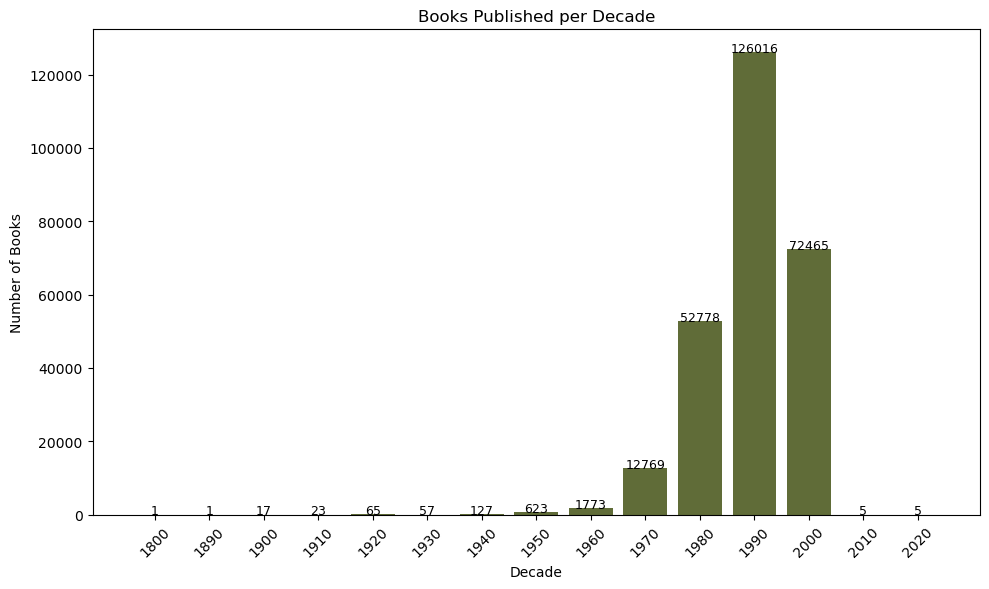

In [179]:
# Books Published per Decade
books_year['Decade'] = (books_year['Year-Of-Publication'] // 10) * 10
decade_counts = books_year['Decade'].value_counts().sort_index()

plt.figure(figsize=(10,6))
# Convert index to int first, then to string
x_labels = decade_counts.index.astype(int).astype(str)

bars = plt.bar(x_labels, decade_counts.values, color='#606c38')

for i, val in enumerate(decade_counts.values):
    plt.text(i, val + 100, str(val), ha='center', fontsize=9)

plt.title('Books Published per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


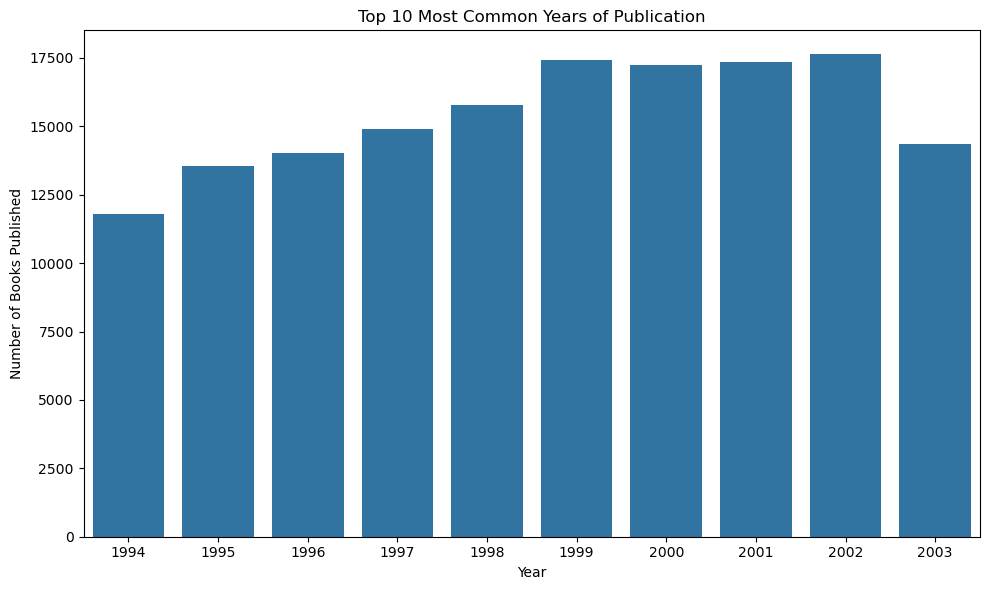

In [133]:
# Top 10 Most Common Years of Publication
top_years = books_year['Year-Of-Publication'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_years.index.astype(int), y=top_years.values)
plt.title('Top 10 Most Common Years of Publication')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.tight_layout()
plt.show()

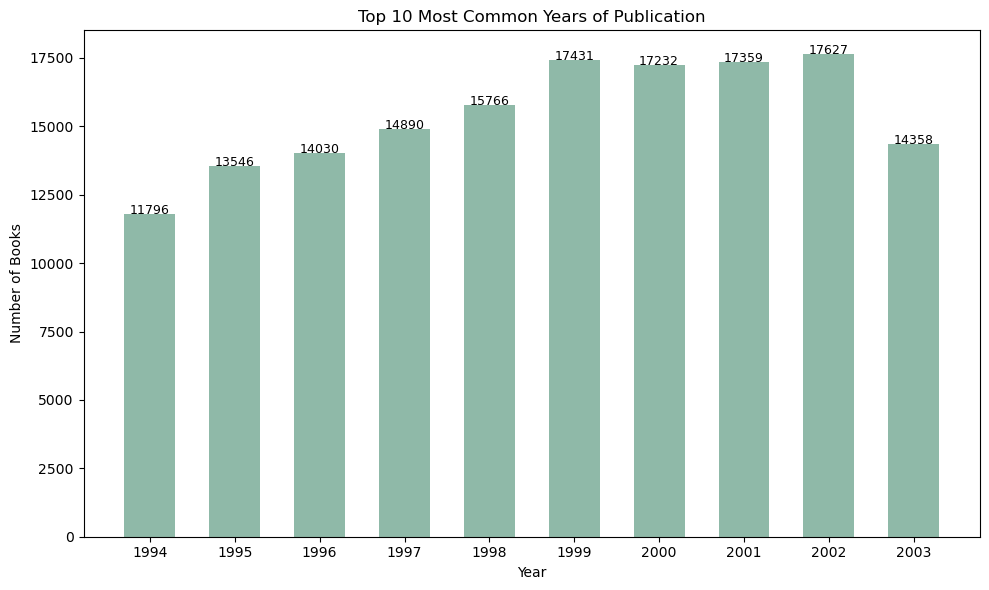

In [185]:
# Top 10 Most Common Years of Publication (Cleaned Up)
top_years = books_year['Year-Of-Publication'].value_counts().sort_values(ascending=False).head(10)
top_years = top_years.sort_index()  # sort by year for visual clarity

plt.figure(figsize=(10,6))
bars = plt.bar(top_years.index.astype(int).astype(str), top_years.values, 
               color='#8FB9A8', width=0.6)  # subtle greenish-blue

# Add numbers on top of bars
for i, val in enumerate(top_years.values):
    plt.text(i, val + 10, str(val), ha='center', fontsize=9)

plt.title('Top 10 Most Common Years of Publication')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()


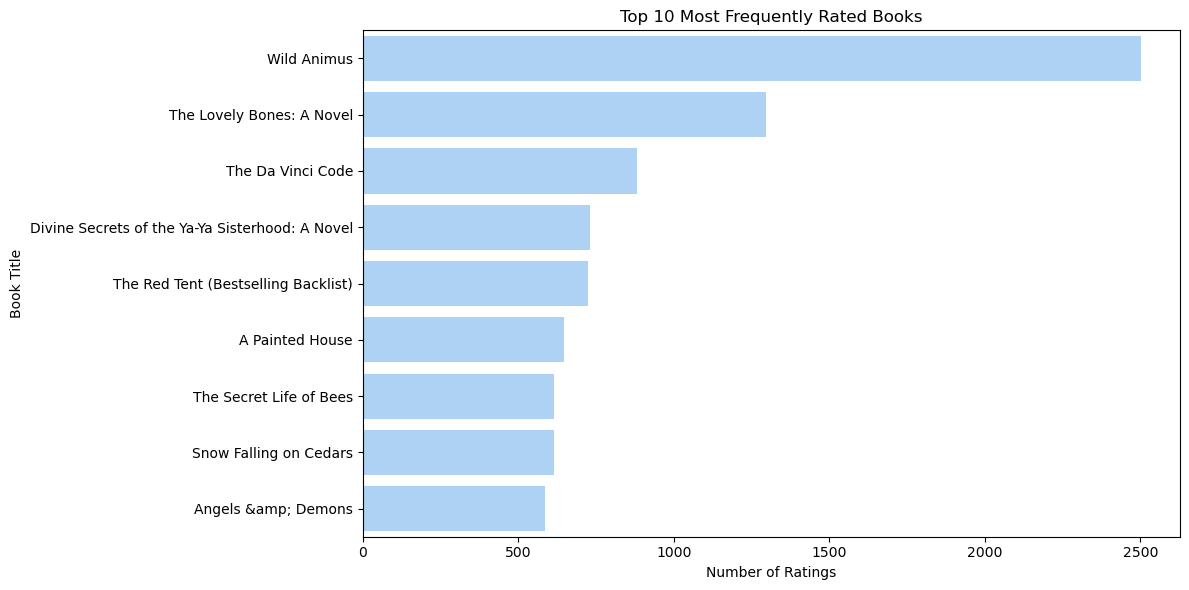

In [189]:
# Top 10 Most Frequently Rated Books
top_rated_books = ratings['ISBN'].value_counts().head(10).reset_index()
top_rated_books.columns = ['ISBN', 'Rating Count']
top_rated_books = top_rated_books.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')

plt.figure(figsize=(12,6))
sns.barplot(y='Book-Title', x='Rating Count', data=top_rated_books, color ='#a2d2ff')
plt.title('Top 10 Most Frequently Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

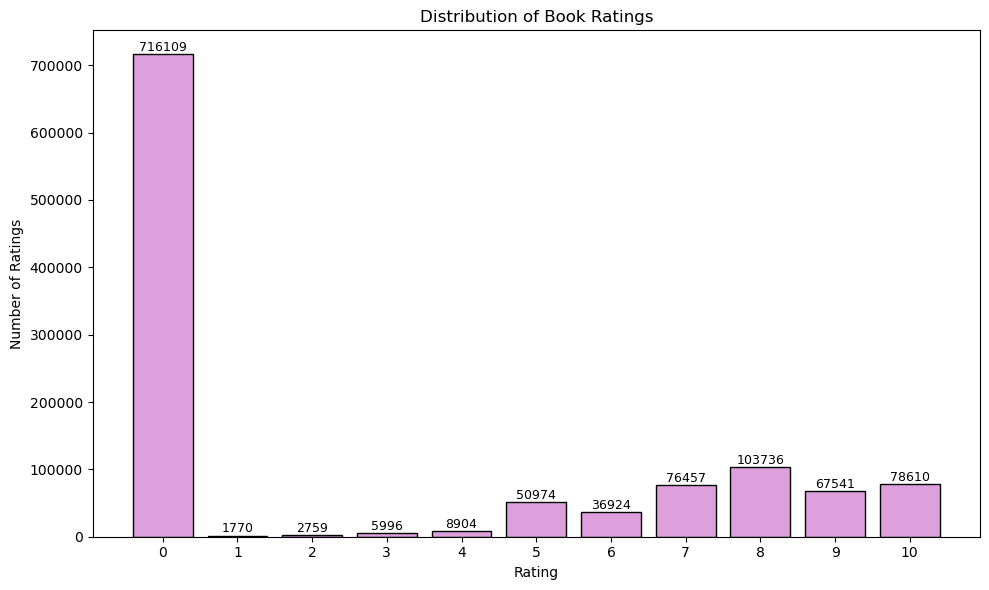

In [171]:
# Distribution of Book Ratings (with count labels)
plt.figure(figsize=(10,6))
rating_counts = ratings['Book-Rating'].value_counts().sort_index()
bars = plt.bar(rating_counts.index, rating_counts.values, color='plum', edgecolor='black')

# Add number labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, str(height),
             ha='center', va='bottom', fontsize=9)

plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(11))
plt.tight_layout()
plt.show()


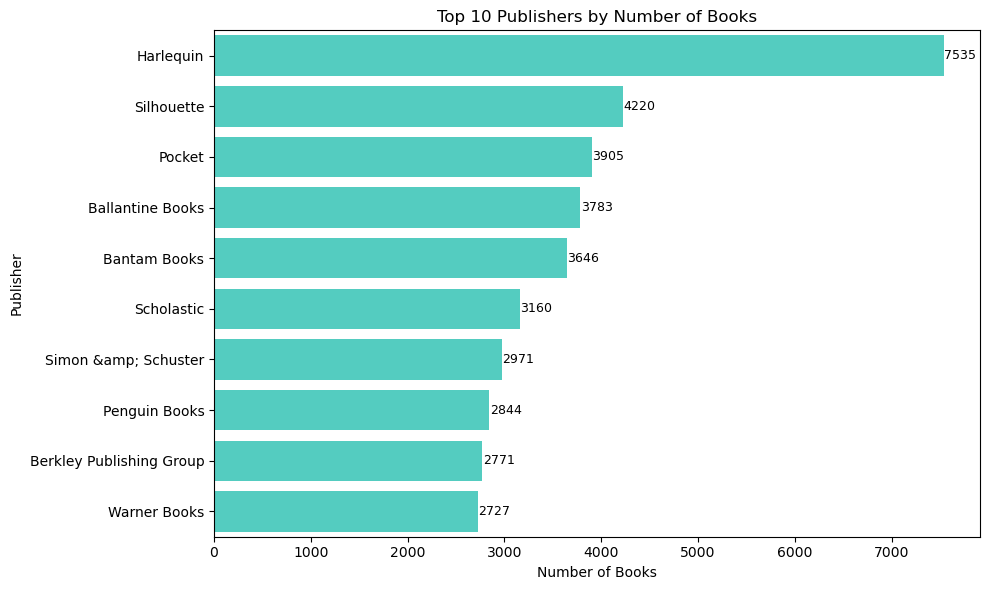

In [141]:
top_publishers = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, color='#40E0D0')  # sienna brown
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')

# Add count labels on bars
for i, v in enumerate(top_publishers.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
!pip install squarify

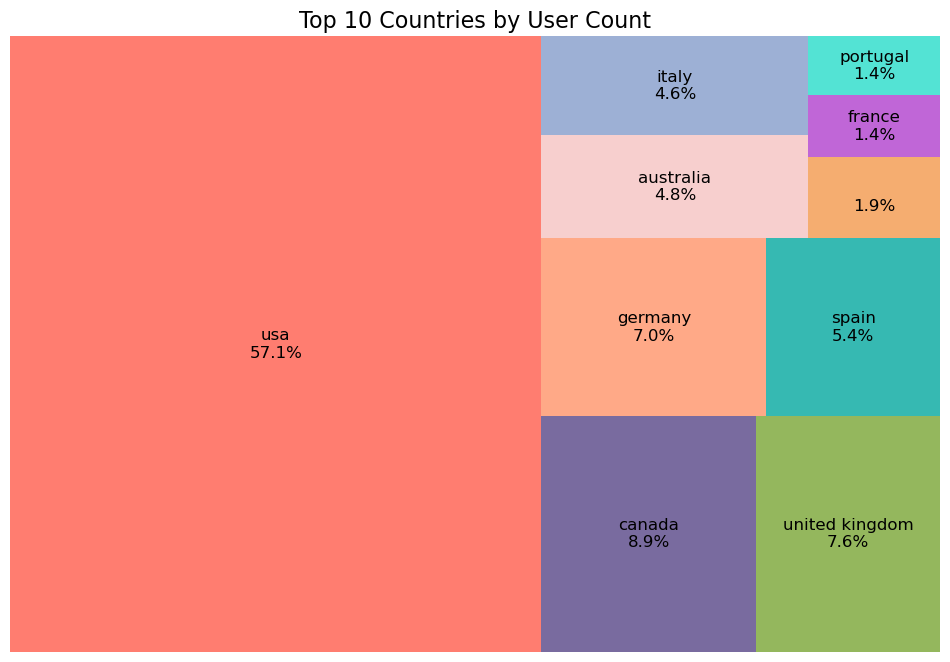

In [193]:
users['Country'] = users['Location'].apply(lambda x: str(x).split(',')[-1].strip())

# Data
top_countries = users['Country'].value_counts().head(10)

# Labels: Country + Percentage
total = top_countries.sum()
labels = [f"{country}\n{count/total:.1%}" for country, count in zip(top_countries.index, top_countries.values)]

# Distinct colors
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#20B2AA',
          '#F7CAC9', '#92A8D1', '#F4A460', '#BA55D3', '#40E0D0']

# Plot
plt.figure(figsize=(12,8))
squarify.plot(sizes=top_countries.values, label=labels, color=colors, alpha=0.9, text_kwargs={'fontsize':12})
plt.axis('off')
plt.title('Top 10 Countries by User Count', fontsize=16)
plt.show()

# 5. Building Model

### Popularity Based Recommender System

In [ ]:
ratings_with_name = ratings.merge(books, on= 'ISBN')

In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)


In [ ]:
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [ ]:
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [ ]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


### Collaborative Filtering Based Recommender System

In [70]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [71]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [72]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
padhne_layak_books = y[y].index 

In [73]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(padhne_layak_books)]

In [74]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [75]:
pt.fillna(0,inplace=True)

In [76]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
similarity_scores = cosine_similarity(pt)

In [79]:
similarity_scores.shape

(706, 706)

In [80]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse = True) [1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [81]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [82]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [83]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


# 6. Exporting Data through pickle for creating webpage

In [197]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))